In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import os

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error

# Data

## Load

In [8]:
data_train = pd.read_csv('./datas/train.csv')
x_test = pd.read_csv('./datas/test.csv')
pd.set_option('display.max_columns', 90)

In [9]:
print(data_train.shape)
data_train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
print(x_test.shape)
x_test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Analyse

### About Target

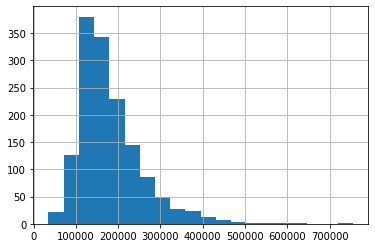

In [11]:
prices = data_train.SalePrice.hist(bins=20)

This histogram seems Distorted distribution to the right. So, It may be Lognormal distribution.

### About Features

In [12]:
data_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

---
Type 'object' has to be encoded numerical. 

# Preprocess

## Split data

In [13]:
_data_train = copy.deepcopy(data_train)
_x_test = copy.deepcopy(x_test)

In [14]:
x_train = _data_train.drop(['Id', 'SalePrice'], axis=1)
y_train = _data_train.SalePrice
id_test = _x_test.Id
x_test = _x_test.drop(['Id'], axis=1)

## Fix scale

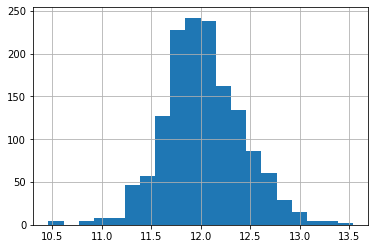

In [15]:
y_train_fix = np.log1p(y_train)
y_train_fix.hist(bins=20)

In this case, use y_train_fix as lognormal distribution.

## Cleaning

### Fill NaN

In [16]:
def  detect_nan(data):
    cols_isnan = []
    cols_isnan_set = []
    for i, isnan in enumerate(data.isnull().any()):
        if isnan is True:
            cols_isnan.append(data.columns[i])
            cols_isnan_set.append((data.columns[i], data.dtypes[i]))
    return cols_isnan, cols_isnan_set

In [17]:
train_cols_isnan, train_cols_isnan_set = detect_nan(x_train)
test_cols_isnan, test_cols_isnan_set = detect_nan(x_test)

In [18]:
train_cols_isnan_set

[('LotFrontage', dtype('float64')),
 ('Alley', dtype('O')),
 ('MasVnrType', dtype('O')),
 ('MasVnrArea', dtype('float64')),
 ('BsmtQual', dtype('O')),
 ('BsmtCond', dtype('O')),
 ('BsmtExposure', dtype('O')),
 ('BsmtFinType1', dtype('O')),
 ('BsmtFinType2', dtype('O')),
 ('Electrical', dtype('O')),
 ('FireplaceQu', dtype('O')),
 ('GarageType', dtype('O')),
 ('GarageYrBlt', dtype('float64')),
 ('GarageFinish', dtype('O')),
 ('GarageQual', dtype('O')),
 ('GarageCond', dtype('O')),
 ('PoolQC', dtype('O')),
 ('Fence', dtype('O')),
 ('MiscFeature', dtype('O'))]

In [19]:
test_cols_isnan_set

[('MSZoning', dtype('O')),
 ('LotFrontage', dtype('float64')),
 ('Alley', dtype('O')),
 ('Utilities', dtype('O')),
 ('Exterior1st', dtype('O')),
 ('Exterior2nd', dtype('O')),
 ('MasVnrType', dtype('O')),
 ('MasVnrArea', dtype('float64')),
 ('BsmtQual', dtype('O')),
 ('BsmtCond', dtype('O')),
 ('BsmtExposure', dtype('O')),
 ('BsmtFinType1', dtype('O')),
 ('BsmtFinSF1', dtype('float64')),
 ('BsmtFinType2', dtype('O')),
 ('BsmtFinSF2', dtype('float64')),
 ('BsmtUnfSF', dtype('float64')),
 ('TotalBsmtSF', dtype('float64')),
 ('BsmtFullBath', dtype('float64')),
 ('BsmtHalfBath', dtype('float64')),
 ('KitchenQual', dtype('O')),
 ('Functional', dtype('O')),
 ('FireplaceQu', dtype('O')),
 ('GarageType', dtype('O')),
 ('GarageYrBlt', dtype('float64')),
 ('GarageFinish', dtype('O')),
 ('GarageCars', dtype('float64')),
 ('GarageArea', dtype('float64')),
 ('GarageQual', dtype('O')),
 ('GarageCond', dtype('O')),
 ('PoolQC', dtype('O')),
 ('Fence', dtype('O')),
 ('MiscFeature', dtype('O')),
 ('SaleT

In [20]:
cols_isnan = train_cols_isnan+test_cols_isnan
cols_isnan_set = train_cols_isnan_set+test_cols_isnan_set
types = [column[1] for column in cols_isnan_set]
uniques = set(types)
uniques

{dtype('float64'), dtype('O')}

In [21]:
def filled(data, cols):
    data_filled = copy.deepcopy(data)
    new_cols = [column+'_filled' for column in cols]
    for i, new_column in enumerate(new_cols):
        data_filled[new_column] = 0
        data_filled.loc[data_filled[cols[i]]!=data_filled[cols[i]], new_column] = 1
    data_filled['IsNaN'] = 0
    for index in range(len(data_filled)):
        if data_filled.iloc[index].isnull().any():
            data_filled['IsNaN'] = 1
    
    for column in cols:
        if data_filled[column].dtype=='object': 
            data_filled[column] = data_filled[column].fillna('NotAvailable')
        if data_filled[column].dtype=='float64':
            concat = pd.concat([x_train[column], x_test[column]])
            median = concat.median()
            data_filled[column] = data_filled[column].fillna(median)           
    return data_filled

In [22]:
x_train_filled = filled(x_train, cols_isnan)
x_test_filled = filled(x_test, cols_isnan)
x_train_filled.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_filled,Alley_filled,MasVnrType_filled,MasVnrArea_filled,BsmtQual_filled,BsmtCond_filled,BsmtExposure_filled,BsmtFinType1_filled,BsmtFinType2_filled,Electrical_filled,FireplaceQu_filled,GarageType_filled,GarageYrBlt_filled,GarageFinish_filled,GarageQual_filled,GarageCond_filled,PoolQC_filled,Fence_filled,MiscFeature_filled,MSZoning_filled,Utilities_filled,Exterior1st_filled,Exterior2nd_filled,BsmtFinSF1_filled,BsmtFinSF2_filled,BsmtUnfSF_filled,TotalBsmtSF_filled,BsmtFullBath_filled,BsmtHalfBath_filled,KitchenQual_filled,Functional_filled,GarageCars_filled,GarageArea_filled,SaleType_filled,IsNaN
0,60,RL,65.0,8450,Pave,NotAvailable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,...,0,0,NotAvailable,NotAvailable,NotAvailable,0,2,2008,WD,Normal,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,20,RL,80.0,9600,Pave,NotAvailable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,...,0,0,NotAvailable,NotAvailable,NotAvailable,0,5,2007,WD,Normal,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,Pave,NotAvailable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,...,0,0,NotAvailable,NotAvailable,NotAvailable,0,9,2008,WD,Normal,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,Pave,NotAvailable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,...,0,0,NotAvailable,NotAvailable,NotAvailable,0,2,2006,WD,Abnorml,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,Pave,NotAvailable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,...,0,0,NotAvailable,NotAvailable,NotAvailable,0,12,2008,WD,Normal,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Encord categorical to numeric

In [25]:
cols_cat = [column for column in x_train_filled.columns \
                     if x_train_filled[column].dtype=='object']

In [26]:
tmp.head()

NameError: name 'tmp' is not defined

In [27]:
encoders = {}
for column in cols_cat:
    encoders[column] = LabelEncoder()
    val = x_train_filled[column].tolist()
    val.extend(x_test_filled[column].tolist())
    encoders[column].fit(val)
    x_train_filled[column] = encoders[column].transform(x_train_filled[column])+1
    x_test_filled[column] = encoders[column].transform(x_test_filled[column])+1

In [28]:
x_train_filled.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_filled,Alley_filled,MasVnrType_filled,MasVnrArea_filled,BsmtQual_filled,BsmtCond_filled,BsmtExposure_filled,BsmtFinType1_filled,BsmtFinType2_filled,Electrical_filled,FireplaceQu_filled,GarageType_filled,GarageYrBlt_filled,GarageFinish_filled,GarageQual_filled,GarageCond_filled,PoolQC_filled,Fence_filled,MiscFeature_filled,MSZoning_filled,Utilities_filled,Exterior1st_filled,Exterior2nd_filled,BsmtFinSF1_filled,BsmtFinSF2_filled,BsmtUnfSF_filled,TotalBsmtSF_filled,BsmtFullBath_filled,BsmtHalfBath_filled,KitchenQual_filled,Functional_filled,GarageCars_filled,GarageArea_filled,SaleType_filled,IsNaN
0,60,5,65.0,8450,2,2,4,4,1,5,1,6,3,3,1,6,7,5,2003,2003,2,2,14,15,2,196.0,3,5,3,3,5,4,3,706,7,0,150,856,2,1,2,6,856,854,0,...,0,0,4,5,2,0,2,2008,10,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,20,5,80.0,9600,2,2,4,4,1,3,1,25,2,3,1,3,6,8,1976,1976,2,2,9,9,3,0.0,4,5,2,3,5,2,1,978,7,0,284,1262,2,1,2,6,1262,0,0,...,0,0,4,5,2,0,5,2007,10,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,5,68.0,11250,2,2,1,4,1,5,1,6,3,3,1,6,7,5,2001,2002,2,2,14,15,2,162.0,3,5,3,3,5,3,3,486,7,0,434,920,2,1,2,6,920,866,0,...,0,0,4,5,2,0,9,2008,10,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,70,5,60.0,9550,2,2,1,4,1,1,1,7,3,3,1,6,7,5,1915,1970,2,2,15,17,3,0.0,4,5,1,5,2,4,1,216,7,0,540,756,2,3,2,6,961,756,0,...,0,0,4,5,2,0,2,2006,10,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,60,5,84.0,14260,2,2,1,4,1,3,1,16,3,3,1,6,8,5,2000,2000,2,2,14,15,2,350.0,3,5,3,3,5,1,3,655,7,0,490,1145,2,1,2,6,1145,1053,0,...,0,0,4,5,2,0,12,2008,10,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Feature Engineering

### ReAnalysis

In [29]:
df = copy.deepcopy(x_train_filled)
df['SalePrice'] = y_train_fix

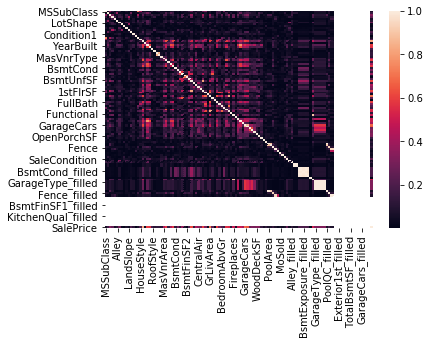

In [30]:
corr = df.corr(method='pearson').abs()
sns.heatmap(corr)

# Learn

In [31]:
model = RandomForestRegressor(n_estimators=10)
kf = KFold(5, shuffle=True, random_state=1).get_n_splits(x_train_filled)
rmse = np.sqrt(-cross_val_score(model, x_train_filled,y_train_fix,
                                                            scoring="neg_mean_squared_error",
                                                            cv=kf, verbose=0))
model.fit(x_train_filled, y_train_fix)

print('---RMSE---')
print('CROSS : {}'.format(rmse))
print('MEAN : {}'.format(rmse.mean()))

---RMSE---
CROSS : [0.14251619 0.16084647 0.15541005 0.13392107 0.15691245]
MEAN : 0.1499212470259702


In [32]:
pred = np.expm1(model.predict(x_test_filled))
print(pred[:5])

[115121.30093622 156542.29090559 172556.57136493 187248.66430298
 198080.16472204]


# Submit

In [34]:
submit = pd.DataFrame({'Id':id_test, 'SalePrice':pred})
submit.to_csv('./submission_template.csv', index=False)